# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [ ]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='yellowgreen', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='yellowgreen', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='teal', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='teal', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, color = 'green', label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='salmon', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='orchid', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='salmon')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='orchid', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

# Пример 0

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 205064.88it/s]


## Визуализация модели

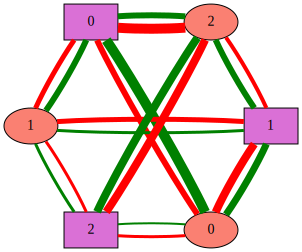

In [ ]:
model.plot_graph(100, 200)

## Результаты моделирования

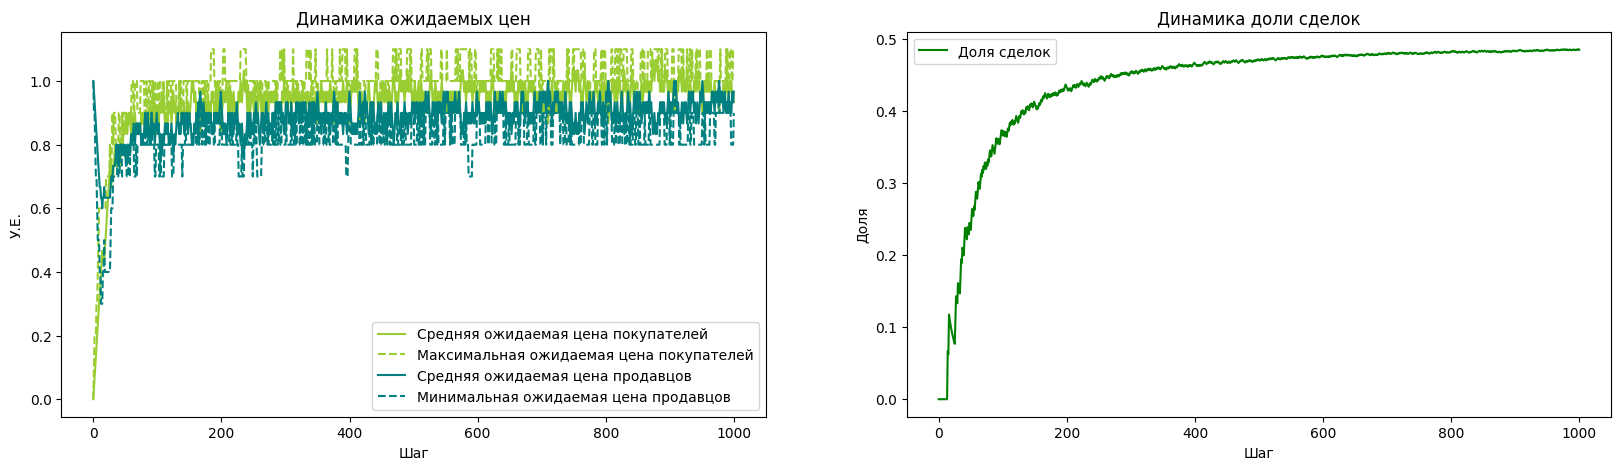

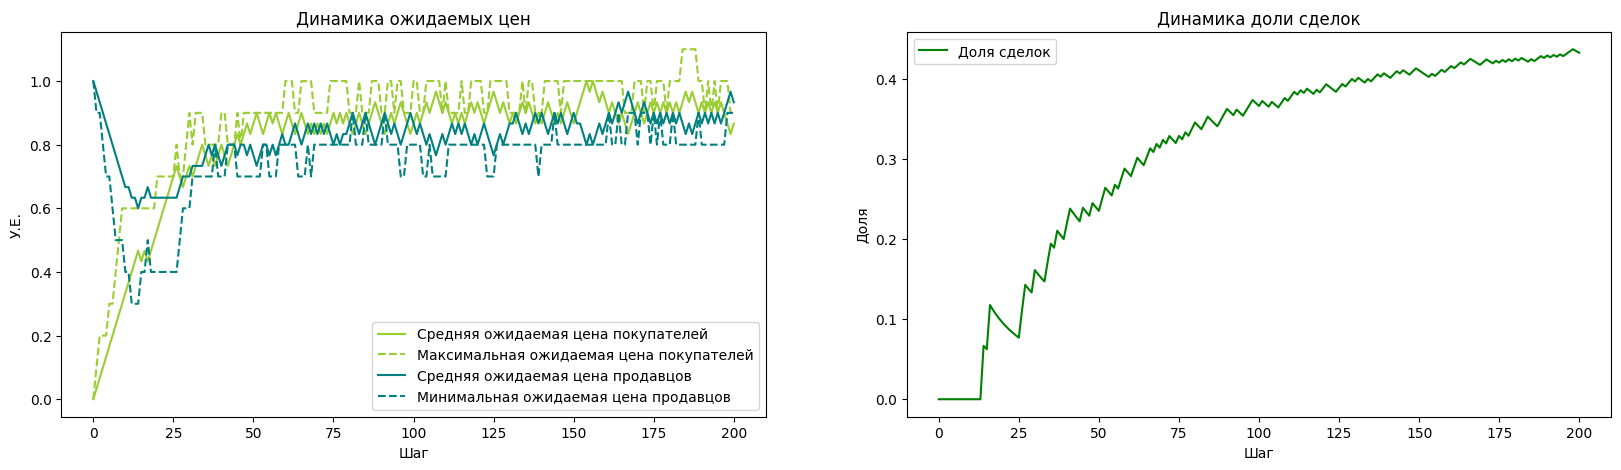

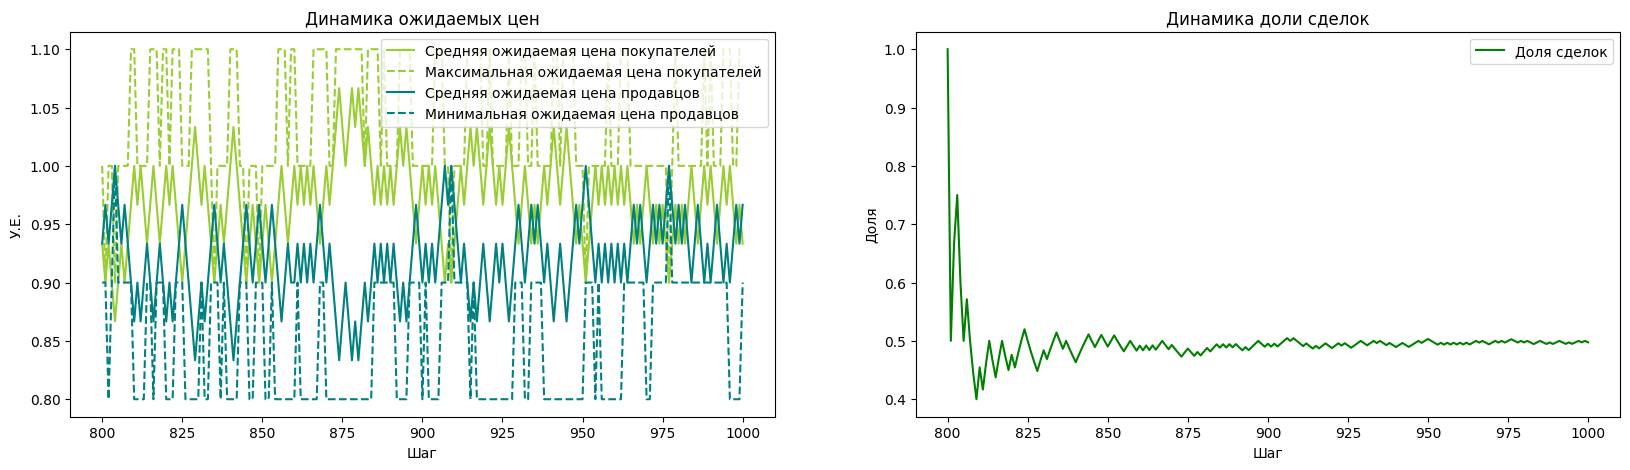

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

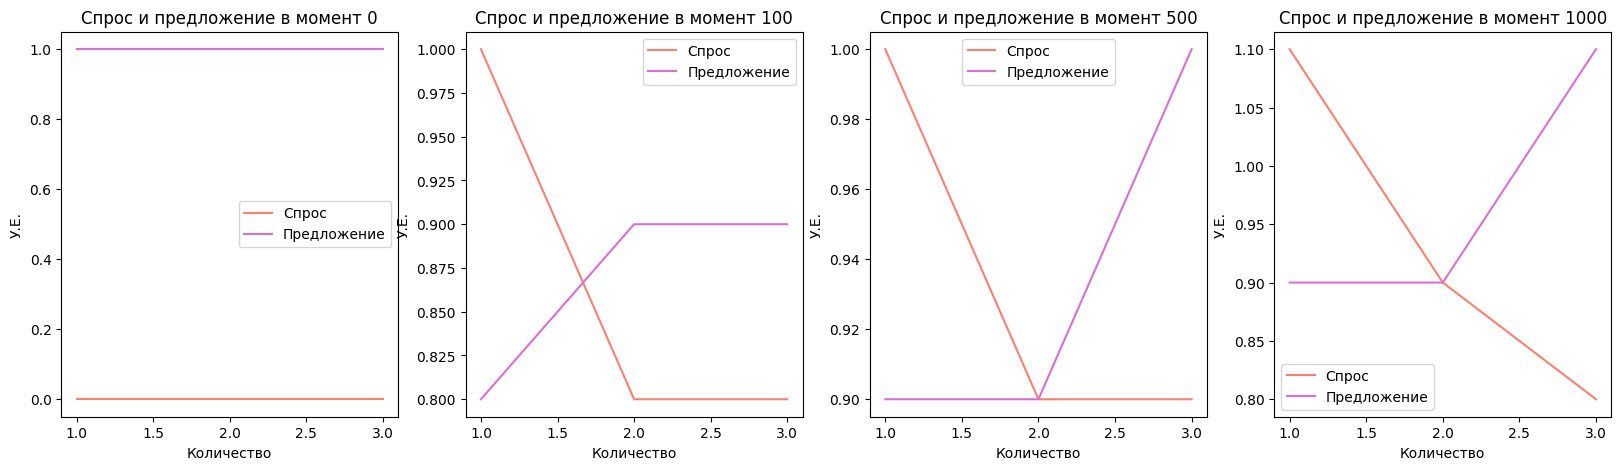

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень.
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

# Пример 1

100%|██████████| 1001/1001 [00:00<00:00, 140057.32it/s]


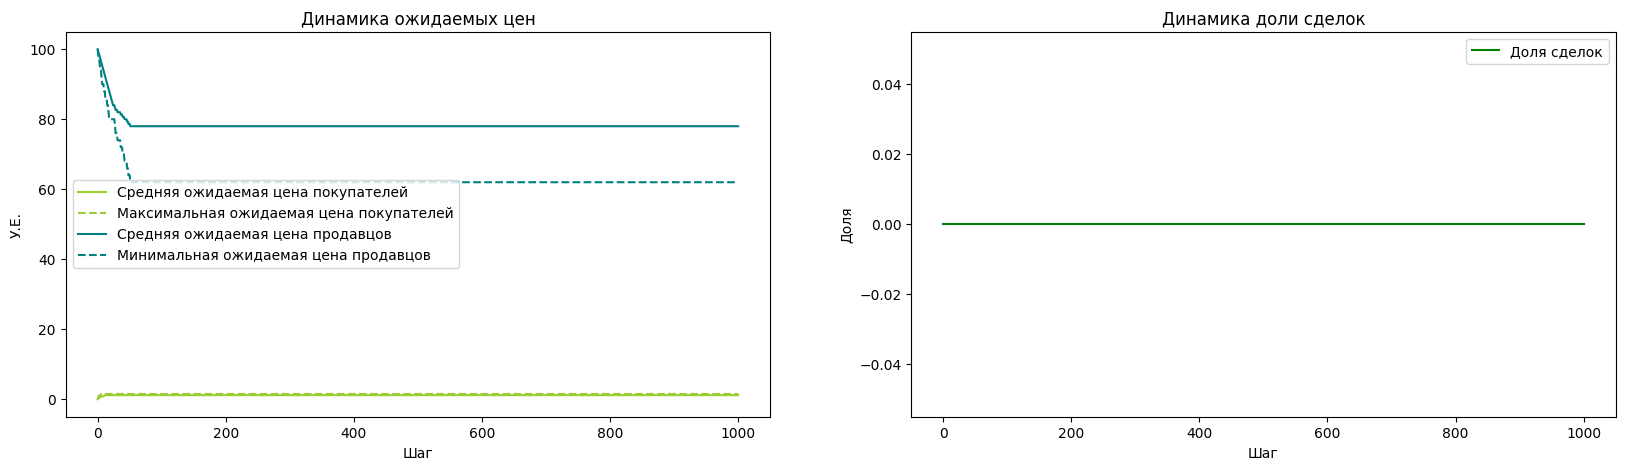

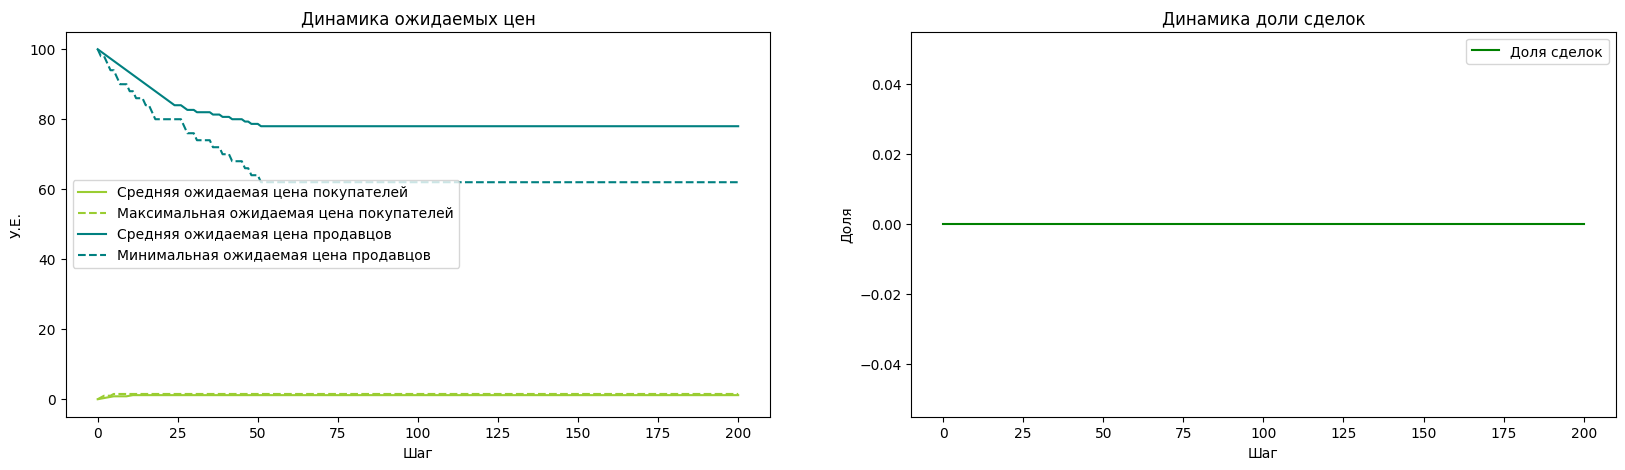

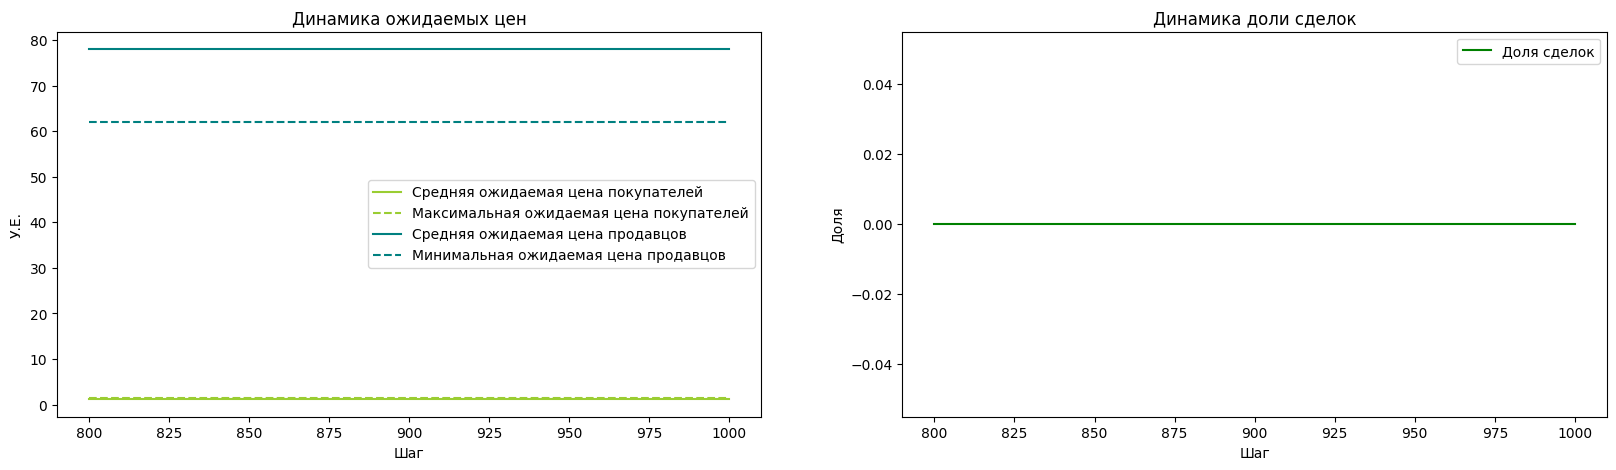

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=1,
              consumer_max=2,
              consumer_delta=0.5,
              seller_min=50,
              seller_max=100,
              seller_delta=2)
model.run(1000)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

# Пример 2

100%|██████████| 1001/1001 [00:00<00:00, 117207.74it/s]


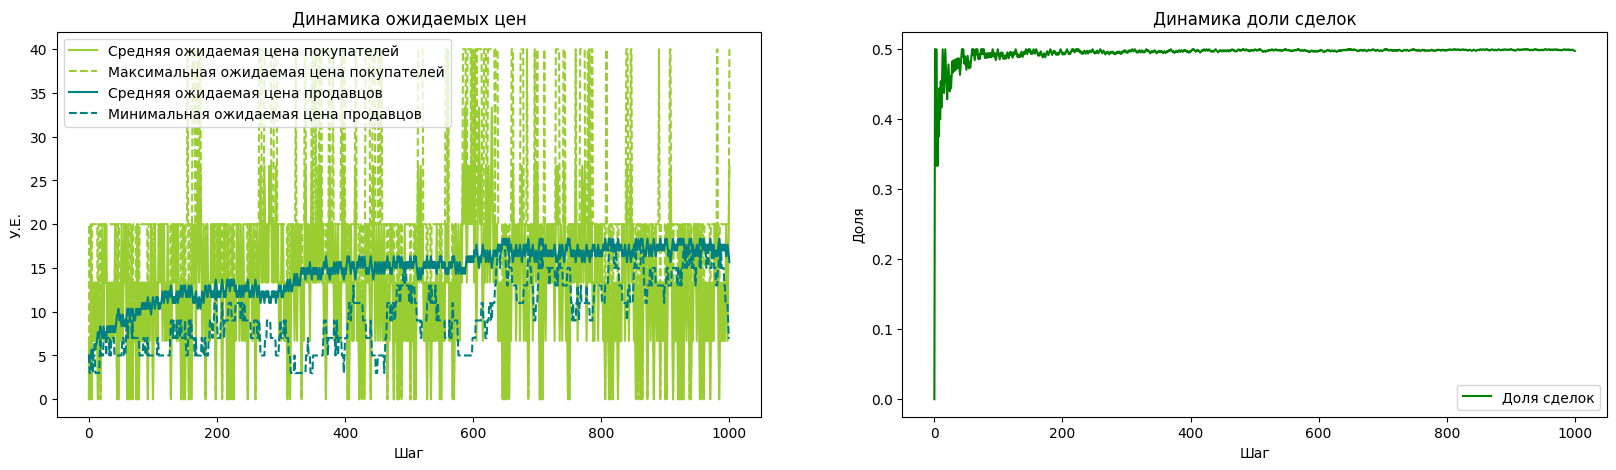

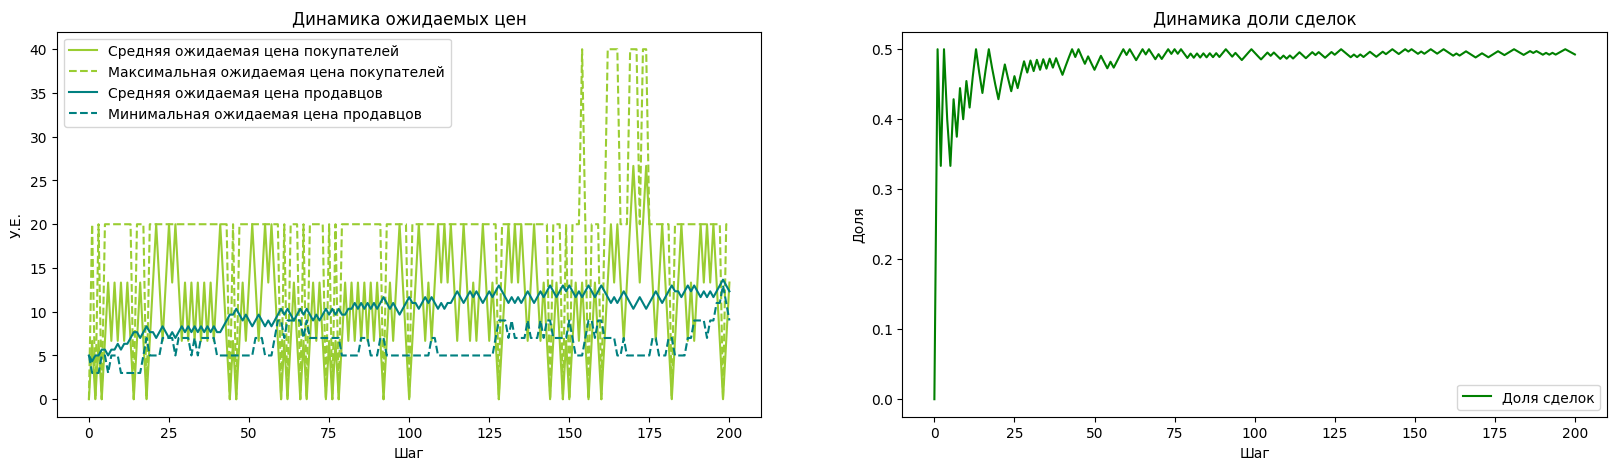

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=50,
              consumer_max=60,
              consumer_delta=20,
              seller_min=0,
              seller_max=5,
              seller_delta=2)
model.run(1000)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)

# Пример 3

100%|██████████| 1001/1001 [00:00<00:00, 185988.23it/s]


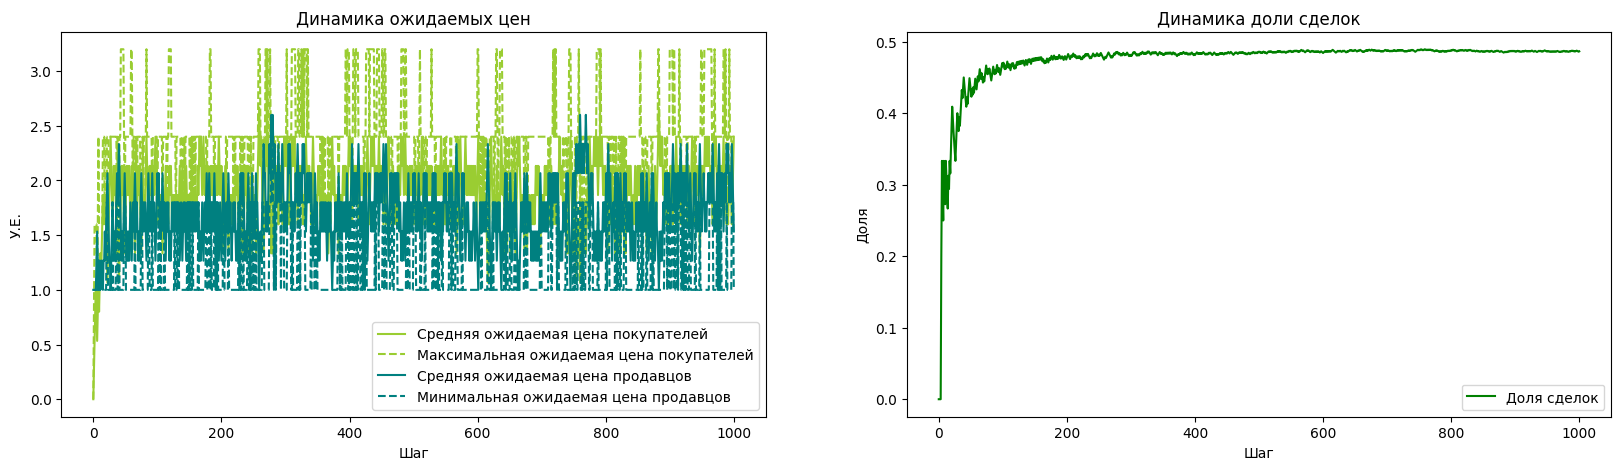

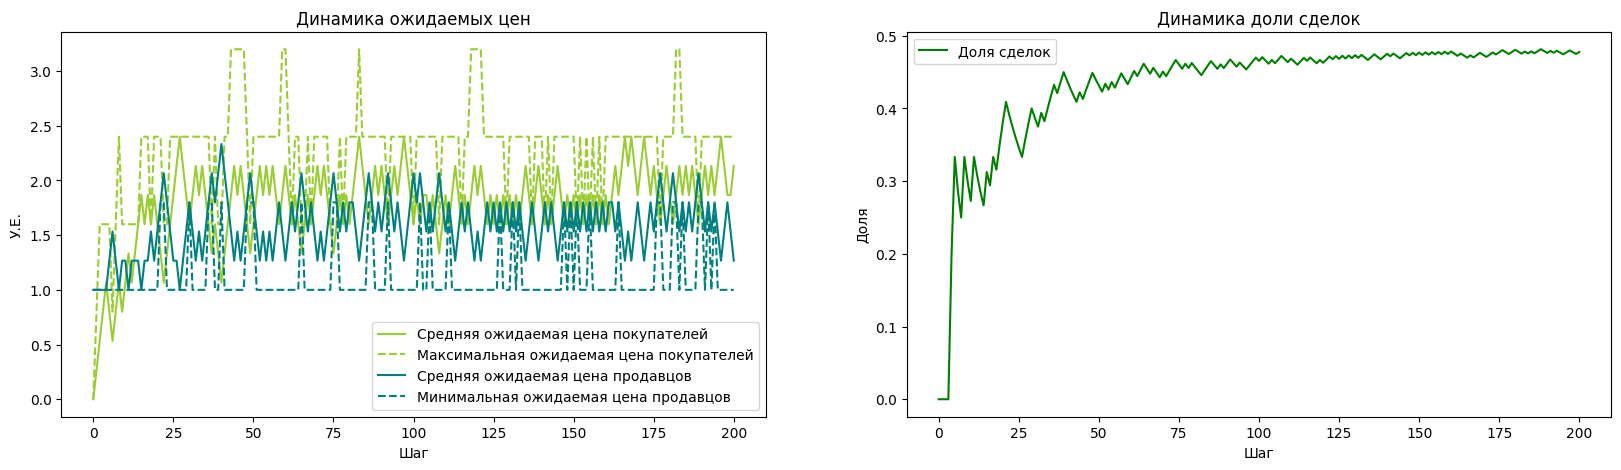

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.8,
              seller_min=0,
              seller_max=1,
              seller_delta=0.8)
model.run(1000)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)

# Пример 4

100%|██████████| 1001/1001 [00:00<00:00, 92677.99it/s]


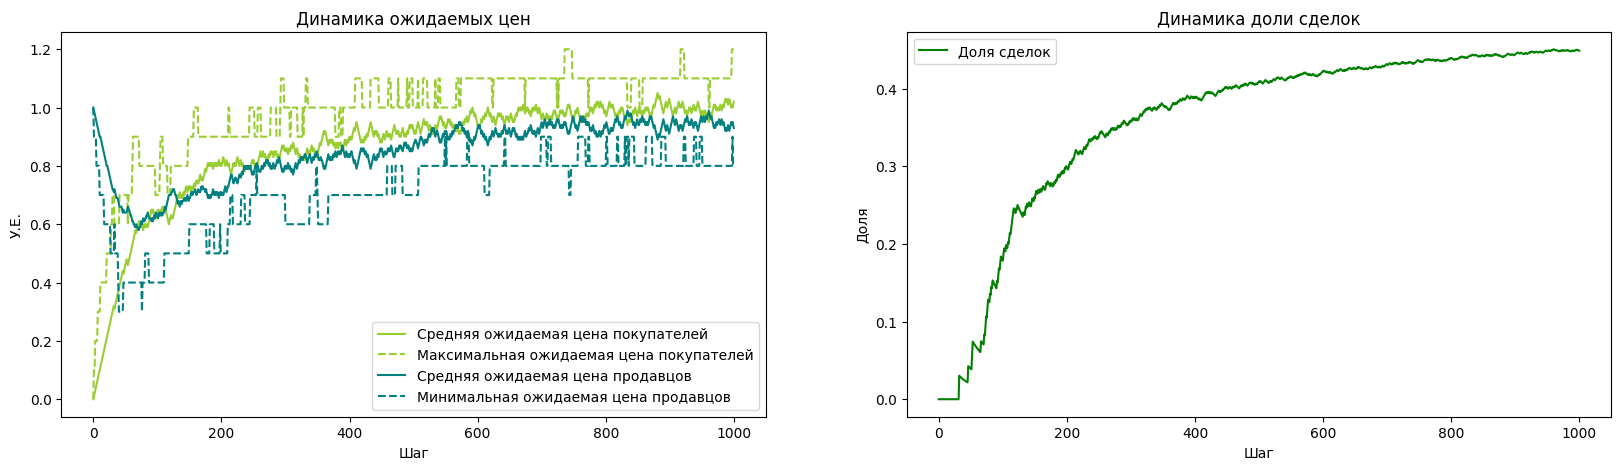

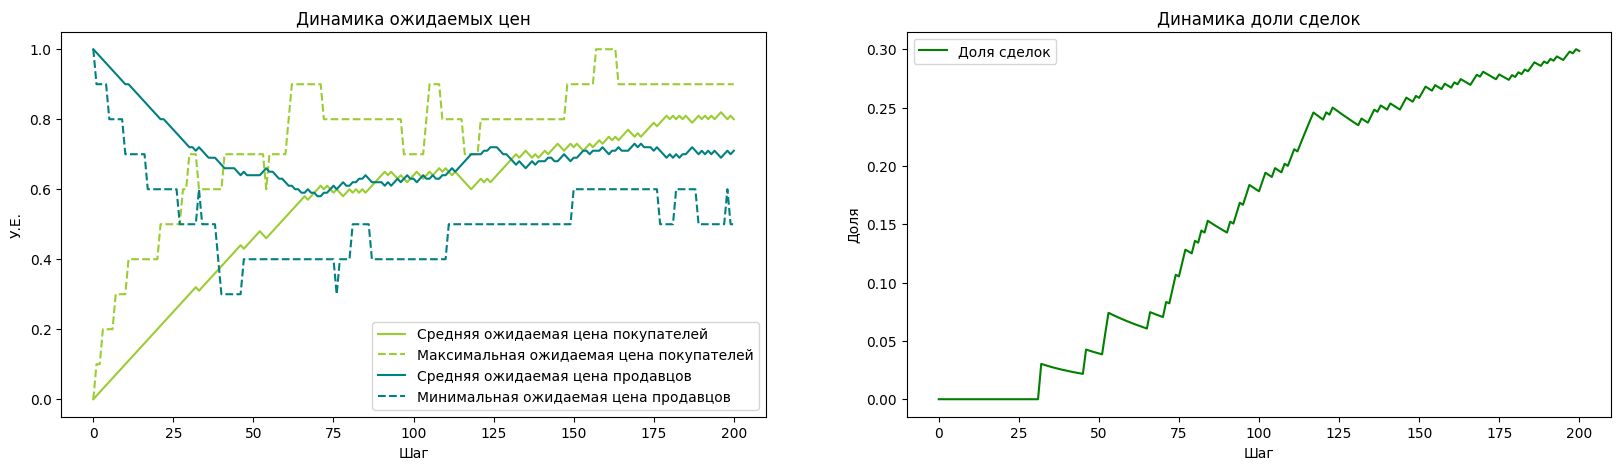

In [ ]:
random.seed(42)
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)

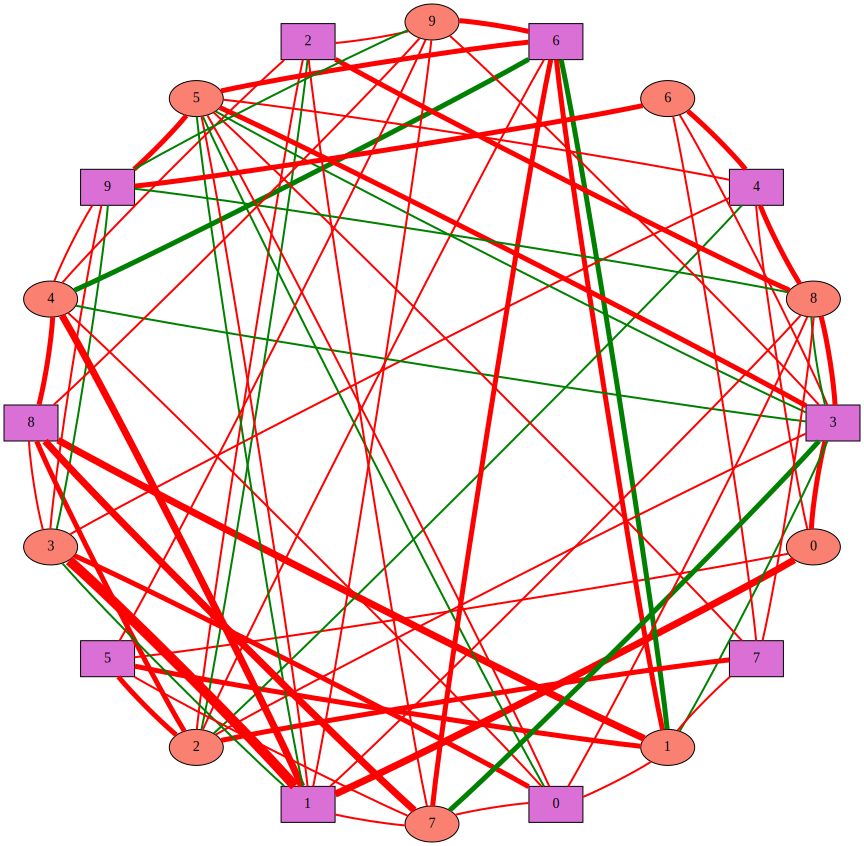

In [ ]:
model.plot_graph(0, 100)

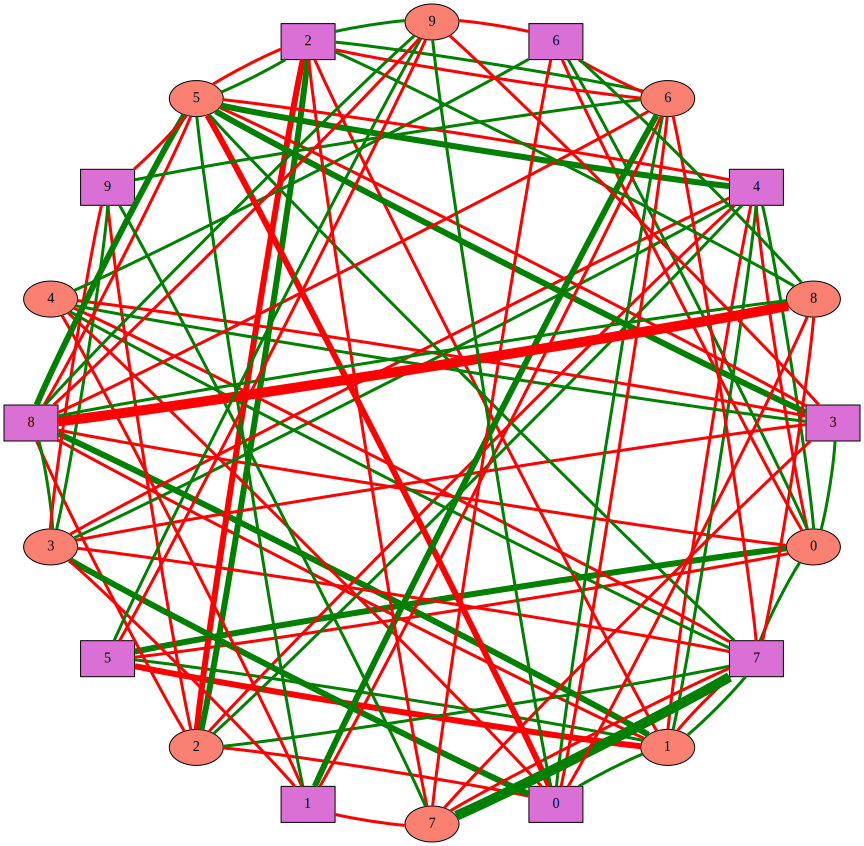

In [ ]:
model.plot_graph(800,900)

*  В начальный момент времени для каждого покупателя **c.expect_price** = 0, а для продавца **s.expect_price = seller_max**. Мы рассматариваем модель только с неотрицательными ценами, поэтому ясно, что ожидаемые цены всех покупателей не выходят за границы отрезка [0; **consumer_max**], а продавцов - [**seller_min**, +$\infty$). Однако если мы объединим всех агентов и проанализируем графики ожидаемых цен, то увидим, что ожидаемые значения цен и для покупателей, и для продавцов на самом деле не выходят за границы отрезка [0; max(**consumer_max; seller_max**)]:

  Если значение **seller_min** превышает **consumer_max**, то сделка никогда не совершится, и тогда верхней границей для ожидаемых цен будет значение **seller_max**, поскольку по построению модели в нулевой момент времени **s.expect_price = seller_max**. Затем ожидаемые цены покупателей будут расти, а продавцов - уменьшаться, однако они так и не пересекутся. Таким образом, максимальным значением ожидаемых цен останется **seller_max**, а минимальным - 0. Этот случай демонстрируется в примере 1.

В начальный момент времени для каждого покупателя **c.expect_price** = 0, а для продавца **s.expect_price = seller_max**. Из этого следует, что условие для заключения сделки (**s.expect_price $\leq$ c.expect_price**) не выполнено, то есть до первого успешного заключения сделки неизбежно должно произойти несколько неудавшихся сделок, в результате которых ожидаемая цена покупателя будет увеличиваться на  **c.delta**, а ожидаемая цена продавца - уменьшаться на **s.delta**, и тем самым они будет приближаться друг к другу. В какой-то момент сделка наконец осуществится, и после каждой новой состоявшейся сделки ожидаемая цена покупателя будет уменьшаться на **c.delta**, а ожидаемая цена продавца - увеличиваться на **s.delta**. И так будет происходить до тех пор, пока **c.expect_price** вновь не станет слишком маленькой, а **s.expect_price** - слишком большой. Однако после этого и продавц, и покупателю, придется вновь изменить цены, чтобы вернуться к тому уровню, когда сделка последний раз состоялась. При достижении "граничных" ожидаемых цен совершения сделки и для продавцов, и для покупателей, они будут сначала вновь отклонятся на delta, вследствие чего сделка будет неврзможна, а затем возвращаться к этому граничному уровню. Из этого можно сделать несколько выводов:
* Для всех покупателей **c.delta** равны, а ожидаемые цены не выходят за границы некоторого промежутка, заданного в условии (аналогично с продавцами), из чего следует, что в какой-то момент все продавцы и покупатели изменяеют свои цены до "граничного" уровня, и повторяется уже описанный процесс (сделка совершается - не совершается и т.д. - это подтверждают "скачки" на графике, отображающем динкамку доли сделок).

  Таким образом, доля сделок сначала равняется 0, после заключения первой сделки выходит на некоторый положительный уровень(этот момент соответствует пересечению линии минимальной ожидаемой цены продавцов и максимальной ожидаемой цены покупателей на графике справа), а после нескольких неудачнх сделок и, как следствие, достижения граничных цен, выходит на некоторый постоянный уровень и начинает напоминать горизонтальную прямую, стремящуюся к значению 0.5 по оси OY (Это видно на графиках доли сделок в период от 0 до 1000 для примеров 0 и 2)

* Из уже сделанных выводов ясно, что чем больше шаг цены, тем быстрее растет **c.expect_price** и падает **s.expect_price**, приближаясь друг к другу $\Rightarrow$ скорость сходимости повышается. Это также вызывает большие колебания средних цен и более быстрое заключение первой сделки: пример 3 в точности повторяет пример 0 за исключением того, что в примере 3 **seller_delta = consumer_delta** = 0.8, а в примере 1 **seller_delta = consumer_delta** = 0.1. Из графиков видно, что при бОльших значениях delta доля сделок растет и выходит на постоянный уровень быстрее, и значения expect_price для продавцов и покупателей также быстрее приближаются друг к другу, хотя, как уже было замечено, амплитуда изменения этих значений в примере 3 больше, чем в примере 1.

* Пример 4, в свою очередь, в точности повторяет пример 0 за исключением того, что в примере 3 **num_of_consumers = num_of_sellers** = 10, а в примере 1 **num_of_consumers = num_of_sellers** = 3. Чем больше на рынке агентов, тем больше времени потребуется, чтобы каждый из них дошел до "граничного" значения ожидаемой цены $\Rightarrow$ в примере 4 доля сделок растет и выходит на постоянный уровень медленнее, а также нужно больше времени для заключения первой сделки (поскольку теперь появляется намного больше комбинаций продавцов и покупателей, а значит, ожидаемые цены меняются медленнее и скорость сходимости также ниже)

* Уже описанные выводы позволяют понять, что в самом начале ожидаемые цены продавцов и покупателей далеки от, скажем так, "компромиссных", поскольку для их достижения должно пройти определенное количество неудачных сделок (эта логика уже была описана) $\Rightarrow$ вначале доля сделок мала - это подтверждает преобладание красных ребер в диаграмме связей (сделки практически не заключаются). Однако после достижения граничных цен, как уже было описано, графику доли сделок свойственны скачки, а в диаграмме связей это отображается как примерно одинаковое количество красных и зеленых ребер.
Данное заключение подтверждается графиками диаграммы связей для периодов от 0 до 100 и от 600 до 700 - при большом количестве покупателе и продавцов хорошо видно, что изначально практически все ребра красные, а с течением времени, когда доля сделок стремится к некоторому постоянному уровню, количество красных и зеленых ребер приблизительно равно

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

## Вариант 3.

 Если выполнены необходимые условия сделки, то цена, по которой покупатель приобретает товар у продавца, рассчитывается по формуле ***c.expect_price* $\cdot$ pos + *s.expect_price* $\cdot$ (1 - pos)**, где pos $\in$ [0; 1], причем позиция покупателя (pos) вычисляется случайным образом для каждого покупателя перед началом всех сделок (будем считать, что в нашей модели рынка переговорные позиции определяются именно покупателями).

 Для анализа поведения цены сделки на рынке создадм метод **plot_prices(i,j)**, который будет строить два графика:

  1) График поведения цен сделки на интервале шагов с **i** по **j**. Кроме непосредственно цен сделки, отобразим на нем еще две кривые: одна будет демонстрировать среднюю цену сделки относительно всех остальных, уже совершенных в период с 0 до соответствующей координаты точки этой кривой по оси OX (красный цвет). А вторая - среднюю цену сделки на конкретном шаге среди всех покупателей

  2) n_consumers точек, отображающих среднюю цену сделки для каждого покупателя на интервале шагов с **i** по **j**

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список, задающий переговорные позиции покупателей. На позиции i находится значение для покупателя с seller_id = i
        self.consumers_value = [random.uniform(0, 1) for _ in range(num_of_consumers)]

        # Список, содержащий цены состоявшихся сделок
        self.prices = []

        # Список списков. На позиции i находится список текущих значений price для всех покупателей на шаге i.
        self.cons_prices = []
        self.cnt = [0 for _ in range(num_of_consumers)]

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])


        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Рассчитываем цену сделки по описанной вначале формуле
            price = self.consumers_value[consumer_id] * self.consumers[consumer_id].expect_price + (1 - self.consumers_value[consumer_id]) * self.sellers[seller_id].expect_price
            # Заносим цену сделки в массив prices
            self.prices.append(price)
            # Цена последней совершенной сделки меняктся для данного покупателя
            self.consumers[consumer_id].deal_price = price

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()


        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Заносим нулевую цену сделки в массив prices
            self.prices.append(0)

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()

        # Сохраняем текущие значения deal_price продавцов
        self.cons_prices.append([consumer.deal_price for consumer in self.consumers])

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)

    def plot_prices(self, start, end):
        '''
        Визуализация динамики цен сделок на шагах от start до end включительно
        '''

        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика цен сделок")

        # Рассчитываем средние значения цен сделок среди всех произошедших к моменту i (в том числе неудачных, когда price = 0) и заносим в массив lst
        sm = 0
        lst = []
        for i in range(start, end + 1):
          sm += self.prices[i]
          lst.append(sm / (i - start + 1))

        ax1.plot(steps_range, self.prices[start : end + 1], color = 'lightgreen', alpha = 0.8, label = "Цена сделки") #график цен всех сделок (в том числе несостоявшихся - в таком случае price = 0)
        ax1.plot(steps_range, lst, linestyle='--', color = 'yellowgreen', label = f"Средняя цена сделки относительно всего периода [{start}; {end}]")
        ax1.plot(steps_range, list(map(mean, self.cons_prices[start : end+1])), color='teal', alpha = 0.7, label = "Средняя цена сделки в текущий момент")

        ax1.legend()
        # Под осью OX второго графика выведем преговорные позиции каждого покупателя, чтобы в дальнейшем провести анализ
        ax1.set_xlabel(f"Шаг \n Переговорные позиции покупателей: {self.consumers_value}")
        ax1.set_ylabel("У.Е.")

        # Список точек по оси покупателей - для более наглядного графика возьмем для кваждого i-го покупателя номер consumer_id + 1, чтобы значение средней цены сделки для первого покупателя не лежало на оси OY
        steps_range = list(range(1, self.num_of_consumers + 1))
        ax2.title.set_text(f"Динамика цен сделок в период [{start}; {end}]")

        # Пройдем по списку списков, в котором находятся цены сделок, соверешенной каждым покупателем на каждом шаге с start до end, и посчитаем среднее значение цен сделок
        sm = 0
        lst = [0] * self.num_of_consumers
        n = end - start + 1
        for i in range(start, end + 1):
          for j in range(len(self.cons_prices[i])):
            lst[j] += self.cons_prices[i][j]
        for i in range(len(lst)):
            lst[i] /= n

        plt.scatter(steps_range, lst, color='teal', label = "Средняя цена сделки")
        for i in range(len(lst)):
          ax2.plot([steps_range[i], steps_range[i]], [0, lst[i]], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
          if (lst[i] != 0): # В том случае, если точка лежит на оси OX, добавлять горизонтальную пунктирную линию не нужно
            ax2.plot([0, steps_range[i]], [lst[i], lst[i]], 'k:')
        # Начало координат будет находиться в левом нижнем углу графика - иначе вспомогательные пунктирные линии не будут доходить до осей
        ax2.spines['left'].set_position('zero')
        ax2.spines['right'].set_visible(False)
        ax2.spines['bottom'].set_position('zero')
        ax2.spines['top'].set_visible(False)

        ax2.legend()
        ax2.set_xlabel("Порядковый номер покупателя")
        ax2.set_ylabel("У.Е.")


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Средние цены сделок ")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='yellowgreen', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='yellowgreen', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='teal', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='teal', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, color = 'green', label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='salmon', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='orchid', label="Предложение")

            plt.ylim([0, 2])
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='salmon')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='orchid', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.deal_price = 0

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


100%|██████████| 1001/1001 [00:00<00:00, 118287.55it/s]


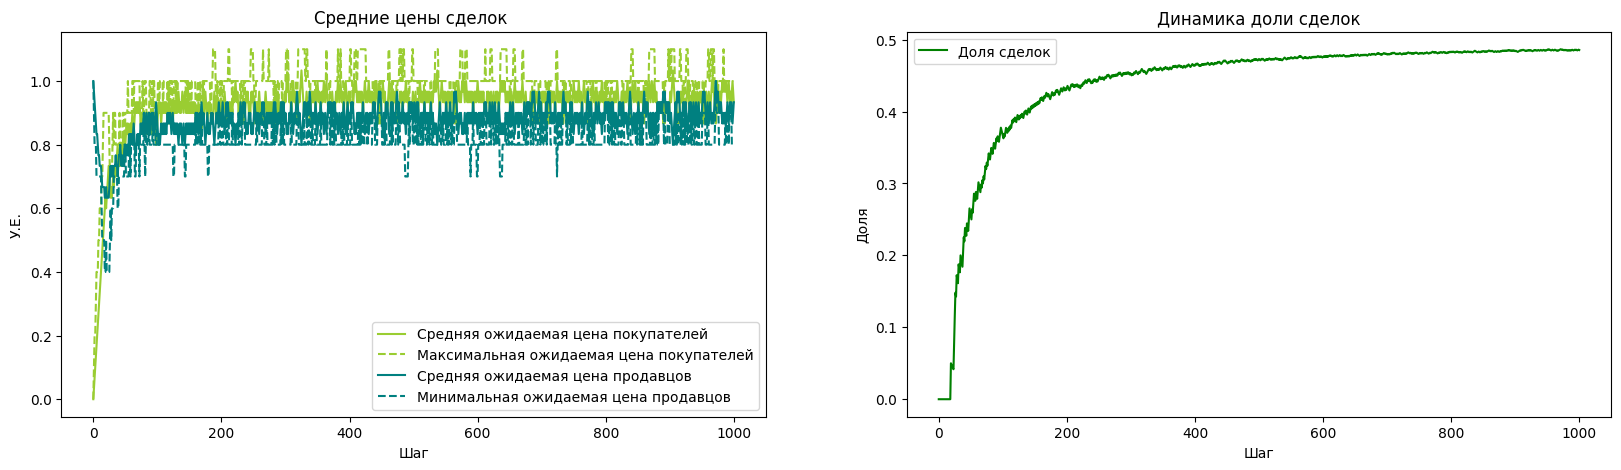

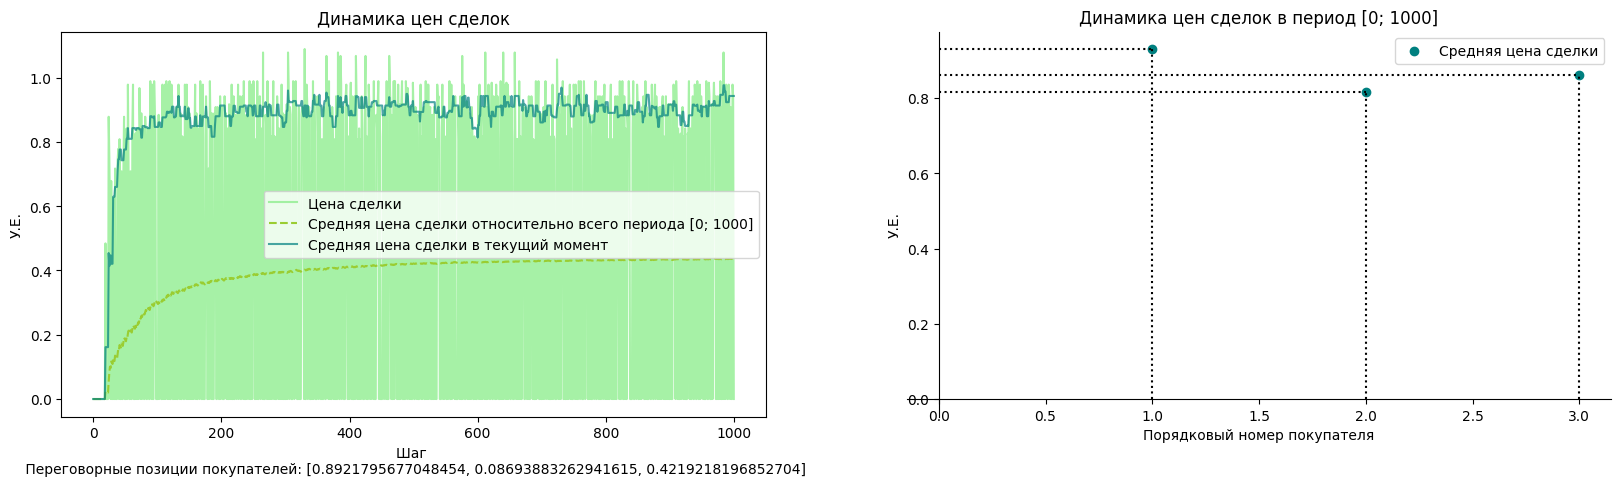

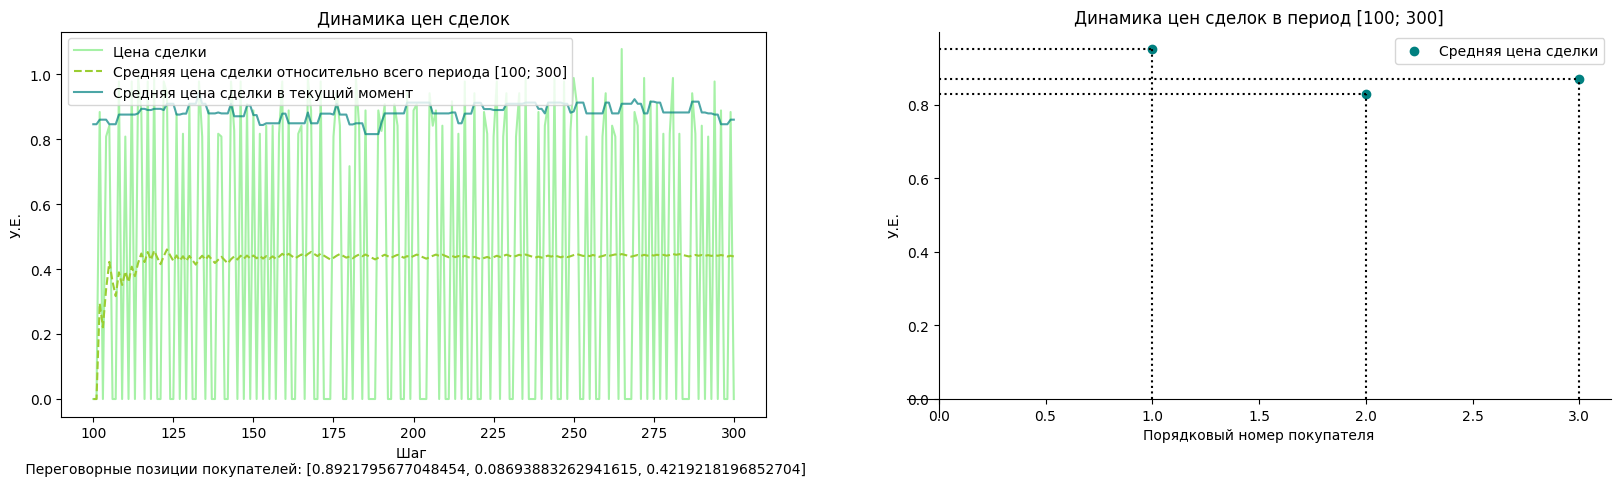

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)
model.plot_dynamics(0, 1000)
model.plot_prices(0, 1000)
model.plot_prices(100, 300)

Проведем анализ полученных графиков:

Во-первых, видно, как растет средняя цена сделки относительно всего периода **[start; end]** - это связано с тем, что происходит рост доли сделок: можно заметить, что красная кривая по форме напоминает кривую на графике "Динамика доли сделок";

Во-вторых, на графике цен сделок (зеленая кривая) наблюдаются "пробелы": они не так заметны при рассмотрении больших промежутков (например, [0; 1000]), однако хорошо видны, например, на отрезке [100; 300], причем видно, что доля несостоявшихся сделок примерно равна 0.5 - это подтверждает выводы, сделанные в задании 1;

В-третьих, при рассмотрении динамики цен сделок отчетливо видно, что чем выше переговорная позиция покупателя, тем выше средняя его средняя цена сделки в период **[start; end]**. Это объясняется тем, что сделка совершается только в том случае, если **s.expect_price $\leq$ c.expect_price** $\Rightarrow$ чем выше коэффициент при **c.expect_price**, тем выше цена сделки (а коэффициент при **c.expect_price** - это и есть переговорная позиция покупателя по построению модели). Этот вывод объясняет то, как взаимосвязаны средняя цена сделки для каждого покупателя с его переговорной позицией.

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день.
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

## Вариант 4

Для адаптации модели к этом описанию модифицируем код:
1. Во-первых, меняется конструктор класса: появляется новое поле **max_connections**, ограничивающее количество контактов между продавцами и покупателями в день
2. Во-вторых, меняется метод **run(n)**, который теперь делает расчет n дней, и в котором, кроме того, содержится генератор, который определяет для каждого продавца случайное количество товара, которое он может продать в один день, а также список продавцов, которые еще не исчерпали этот запас и не ушли с рынка в текущий день. Эти значения обновляются перед началом каждого нового дня. Более детальное объяснение модификации описано в самом коде
3. В-третьих, метод **plot_dynamics(i,j)** теперь который строит графики анализа поведения моделей на интервале дней с **i** по **j**; По построению модели в день происходит **max_connections** сделок, поэтому для удобства будем их нумеровать, не обнуляя перед началом новго дня $\Rightarrow$ при рассмотрении n дней на самом деле будем просто рассматривать **n $\cdot$ max_connections** взаимодействий. Тогда для того, чтобы различать разные дни, на графике проведем пунктирные вертикальные линии, между которыми и расположен один день

  Метод **plot_graph(i, j)** теперь строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j** день


In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_connections -- максимальное количество контактов между продавцами и покупателями в день

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for i in trange(num_of_steps + 1): # trange вместо range для визуализации прогресс-бара
            # Перед каждым новым днем обновляем случайное количество товара, которое каждый продавец может продать в один день, и список продавцов, которые в этот день еще не ушли с рынка
            available_sellers = list(range(0, self.num_of_sellers))
            num_of_goods = [random.randint(1, self.max_connections) for x in range(self.num_of_sellers)]
            for j in range(self.max_connections): # Каждый день совершается max_connections попыток сделок
              # Выбираем случайным образом продавца, но при данной модификации модели не из всех, а только из тех, у кого осталось ненулевое количество товара (то есть кто еще не ушел с рынка в этот день)
              consumer_id = random.randrange(0, self.num_of_consumers)

              # Проверка, остались ли в текущий день на рынке еще продавцы: если нет, то день принудительно завершается, поскольку покупателям теперь не с кем взаимодействовать
              if (available_sellers):
                # Выбираем индекс продавца случайным образом
                seller_id = random.choice(available_sellers)
                # Моделируем сделку
                self.deal(consumer_id, seller_id)
                # Если сделка прошла успешно, то уменьшаем количество товара, сотавшееся у продавца
                if self.deals_results[-1]['result'] == 1:
                  num_of_goods[seller_id] -= 1
                  # Если у продавца не осталось товаров, то в текущий день он больше не может взаимодейтсовать с покупателями, поэтому мы удаляем его из списка продавцов, находящихся на рынке
                  if num_of_goods[seller_id] == 0:
                    available_sellers.remove(seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели в дни от start до end включительно
        '''
        #Как уже было описано перед кодом, при рассмотрении дней фактически рассматриваем взаимодействия, происходящие в течение этих дней, то есть нам нужно рассмотреть моменты с self.max_connections * start до self.max_connections * end
        start *= self.max_connections
        end *= self.max_connections

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='yellowgreen', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='yellowgreen', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='teal', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='teal', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        # Находим долю успешных сделок в дни от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, color = 'green', label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

        #Строим вертикальные линии, отделяющие дни друг от друга
        for i in range(start, end + 1):
          if i % self.max_connections == 0:
            ax1.axvline(x=i, color='tab:cyan', ls='--', label='axvline - full height')
            ax2.axvline(x=i, color='tab:cyan', ls='--', label='axvline - full height')

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в день {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='salmon', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='orchid', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            в дни от start до end.
        '''
        #Как уже было описано перед кодом, при рассмотрении дней фактически рассматриваем взаимодействия, происходящие в течение этих дней, то есть нам нужно рассмотреть моменты с self.max_connections * start до self.max_connections * end
        start *= self.max_connections
        end *= self.max_connections
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='salmon')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='orchid', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



# Пример 5

100%|██████████| 11/11 [00:00<00:00, 23325.25it/s]


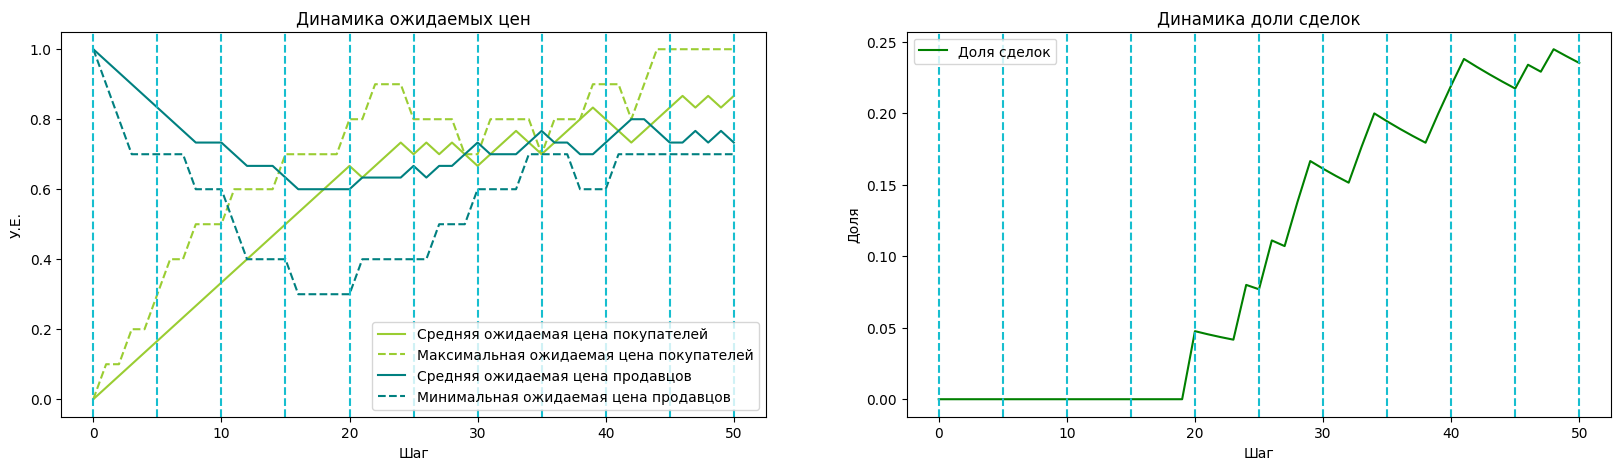

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections=5)
model.run(10)
model.plot_dynamics(0, 10)

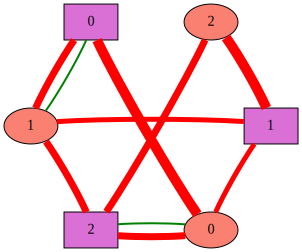

In [ ]:
model.plot_graph(0, 5)

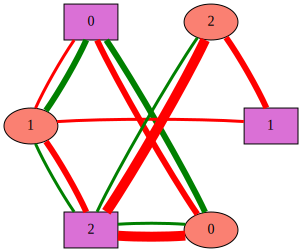

In [ ]:
model.plot_graph(6, 10)

# Пример 6

100%|██████████| 11/11 [00:00<00:00, 1928.74it/s]


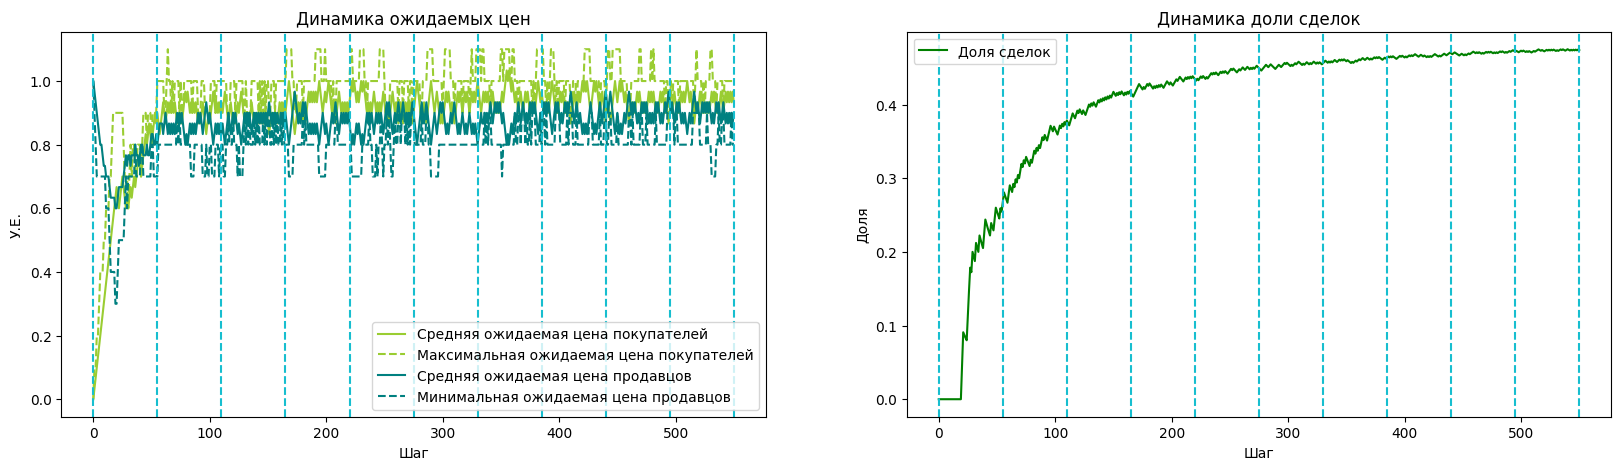

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections=55)
model.run(10)
model.plot_dynamics(0, 10)

Проанализируем результаты работы модели:
* Во-превых,в целом к дням применима та же логика и те же выводы, что и при последовательно совершающихся сделках (см. Задание 1). Так, например, в Примере 6 видно, что в нулевой день доля сделок меньше, чем, например, в пятый, а ожидаемые цены находятся дальше друг от друга, однако в этот же день стремительно друг к другу стремятся и, наконец, где-то в середине первого дня пересекаются; на диаграмме связей для Прмера 5 видно, что в первый период (с 0 по 5 день) происходит мало успешеых сделок, а во второй (с 6 по 10 день) увеличивается - эта же закономерность видна на графике доли сделок.
* Теперь проанализируем влияние параметра **max_connections** на поведение модели: для этого рассмотрим две одинаковы модели, которые отличаются друг от друга только этим значением: в Примере 5 **max_connections** = 5, а в Примере 6 **max_connections** = 55; интуитивно понятно, что при бОльшем количестве контактов продавцов с покупателями в день скорость сходимости средних цен быстрее, и доля сделок растет стремительнее - именно это мы т видим при анализе графиков: в Примере 5 первое пересечение средних цен для продавца и покупателя происходит только в начале 4 дня, а в Примере 6 - уже в середине нулевого. Кроме того, в Примере 5 к концу десятого дня доля сделок достигает уровня 0.25 и еще не выходит на постоянный уровень, а в Примере 6 к этому же времени она близка к 0.5 и в псоледние дни кривая становится все больше похожа на горизонтальную прямую, то есть доля сделок уже вышла на постоянный уровень.


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

Покупатели делятся на две группы: одни готовы купить товар только в том случае, если продавец может его доставить, а вторые согласны на самовывоз. Аналогичная ситуация с продавцами: у кого-то есть возможность организовать доставку (за дополнительную плату), а у кого-то нет.

Перед запуском модели определим число **num_of_sellers_delivery**, которое соответствует тому, что первые **num_of_sellers_delivery** продавцов готовы заняться организацией доставку (ясно, что 0 $\leq$ num_of_sellers_delivery $\leq$ num_of_sellers). Каждый продавец, согласившийся осуществить доставку, несет дополнительные расходы, поэтому для того, чтобы не понести убытки, он устанавливает цену за доставку **s.delivery**: она будет равна **p%** от значения **s.min_price**, определяемого для каждого продавца перед началом всех сделок. Однако цены на доставку фиксированы и не меняются в течение всего периода вне зависимости от исходов сделок и изменения **s.expect_price**. В случае, если продавец не готов доставлять товар, скажем, что **s.delivery** = 0 - для нас это будет идентификатором того, что покупка товара возможна только при условии самовывоза покупателем.

Присвоим каждому покупателю перед совершением сделок случайное значение (**c.delivery**) - 0 или 1, где 1 будет соответствовать случаю, когда покупатель может самостоятельно забрать товар, а 0 - когда у него нет возможности осуществить самовывоз, и он согласен купить товар только в том случае, если продавец готов его доставить.


Кроме того, добавим два новых метода для визуализации поведения модели: **plot_delivery** и **plot_delivery_stat**, предназначенные для демонстрации динамики количества и доли доставок.

Более подробная техническая модификация модели описана в коде

Ясно, что теперь сделка не осуществится в тех случаях, если:

1. Покупателю требуется доставка, но:

  1.1. Продавец не готов ее организовать

  1.2. Ожидаемая цена продавца + цена за доставку превышают ожидаемую цену покупателя

2. Покупателю не требуется доставка, но:

  2.1 Ожидаемая цена продавца превышает ожидаемую цену покупателя

In [ ]:
from matplotlib.rcsetup import np
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, num_of_sellers_delivery, percent):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            num_of_sellers_delivery -- количество продавцов, готовых организовать доставку
            percent -- процент стоимости доставки

        '''
        #Переменная для контроля количества продавцов, у которых уже установлена цена доставки; делаем ее глобальной, поскольку она еще пригодится в классе Seller, однако обнудяется при каждом новом запуске модели
        global cnt
        cnt = 0

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta, num_of_sellers_delivery, percent) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        self.delivery_list = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        # Проверим, выполняется ли одно из трех условий, указанных при описании модифицированной модели, при которых сделка считается несостоявшейся:
        if (self.consumers[seller_id].delivery == 1 and self.sellers[seller_id].delivery == 0) or (self.consumers[seller_id].delivery == 1 and (self.sellers[seller_id].expect_price + self.sellers[seller_id].delivery) > self.consumers[consumer_id].expect_price) or (self.consumers[seller_id].delivery == 0 and self.sellers[seller_id].expect_price > self.consumers[consumer_id].expect_price):
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })


            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()

            # Если сделка не состоялась, то и доставка не была осуществлена => записываем факт несостоявшейся доставки
            self.delivery_list.append(0)

        else:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

            if (self.consumers[consumer_id].delivery == 1):
              # Если покупателю требовалась доставка, то сделка могла состояться только в том случае, если продавец был готов ее организовать => записываем факт состоявшейся доставки
              self.delivery_list.append(1)
            else:
              # Если покупателю не требовалась доставка, то она и не была осуществлена => записываем факт состоявшейся доставки
              self.delivery_list.append(0)


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (15,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='yellowgreen', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='yellowgreen', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='teal', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='teal', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, color = 'green', label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_delivery(self):
      '''
          Визуализация динамики количества доставок на шагах от 1 до 1000 включительно
      '''

      # Формируем размер графика
      fig = plt.figure(figsize = (15,5))
      ax1 = fig.add_subplot(1,1,1)

      # Список, в который будем заносить названия для оси (рассматриваемый отрезок шагов)
      a = []

      # Список,в который будем заносить количество осуществленных доставок в течение рассматриваемого отрезка шагов
      b = []

      for i in range(0, 1000, 100):
        a.append(f"[{i}; {i + 100}]")
        b.append(sum(self.delivery_list[i:i+101]))
      ax1.bar(a, b, color = 'green', alpha = 0.5, label = "Количество доставок")

      ax1.title.set_text("Динамика количества доставок в период [0; 1000]")
      ax1.legend()
      ax1.set_xlabel("Интервал шагов")
      ax1.set_ylabel("Количество")

    def plot_delivery_stat(self, start, end):
        '''
            Визуализация динамики доли доставок на шагах от start до end включительно
        '''
        # Формируем размер графика
        fig = plt.figure(figsize = (15,5))
        ax1 = fig.add_subplot(1,2,1)

        # Находим долю осуществленных доставок на отрезке от start до end включительно
        deliv_sum = [0]
        steps_range = list(range(start, end+1))
        for i in range(start, end+1):
            deliv_sum.append(deliv_sum[-1] + self.delivery_list[i])
        deals_fraction = [deliv_sum[i] / i for i in range(1, end - start + 2)]

        ax1.title.set_text("Динамика доли доставок")
        ax1.plot(steps_range, deals_fraction, color = 'teal', label="Доля доставок")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='salmon', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='orchid', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):

            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='salmon')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='orchid', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.delivery = random.randint(0, 1)

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta

class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, num_of_sellers_delivery, percent):
        global cnt
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        # Если еще есть "свободные места" для продавцов, которые могут организовать доставку, то назначаем цену доставки
        if cnt < num_of_sellers_delivery:
          self.delivery = (percent / 100) * self.min_price
          cnt += 1
        else:
          # Если num_of_sellers_delivery значений уже занято, то остальные продавцы осуществлять доставку не могут
          self.delivery = 0

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Пример 6

100%|██████████| 1001/1001 [00:00<00:00, 143671.02it/s]


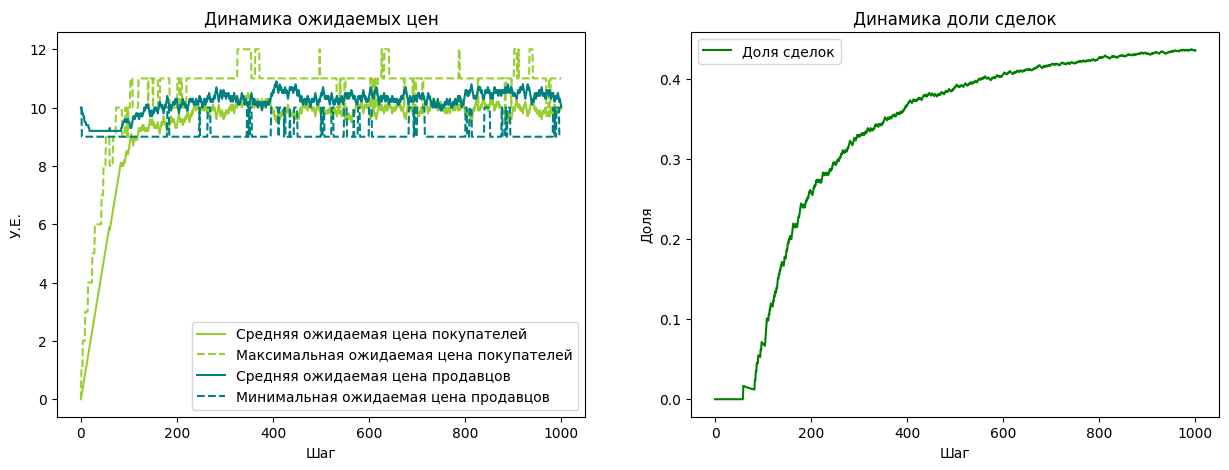

In [ ]:
random.seed(42)
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=10,
              consumer_max=20,
              consumer_delta=1,
              seller_min=8,
              seller_max=10,
              seller_delta=1,
              num_of_sellers_delivery=10,
              percent = 1)
model.run(1000)
model.plot_dynamics(0, 1000)

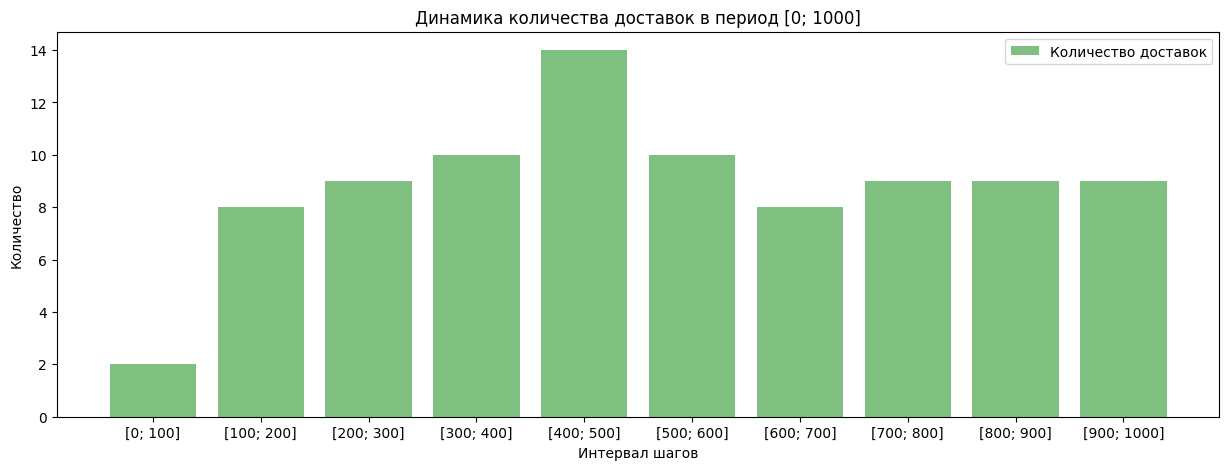

In [ ]:
model.plot_delivery()

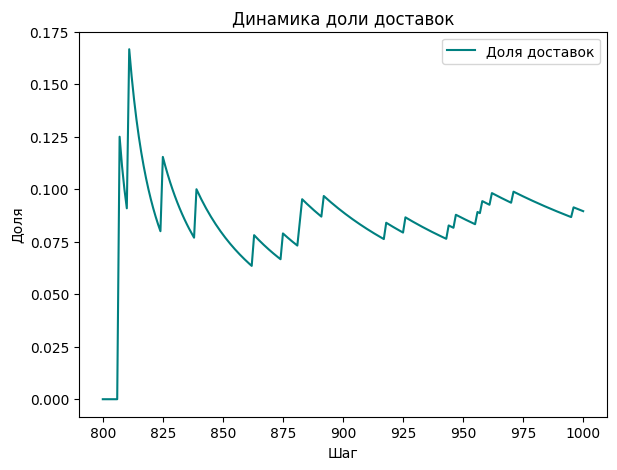

In [ ]:
model.plot_delivery_stat(800, 1000)

## Пример 7

100%|██████████| 1001/1001 [00:00<00:00, 116624.95it/s]


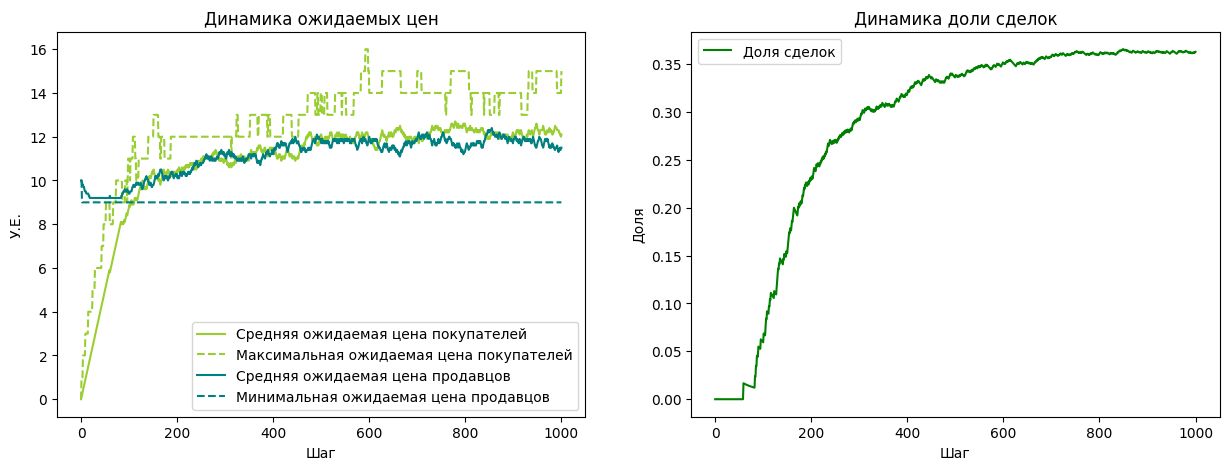

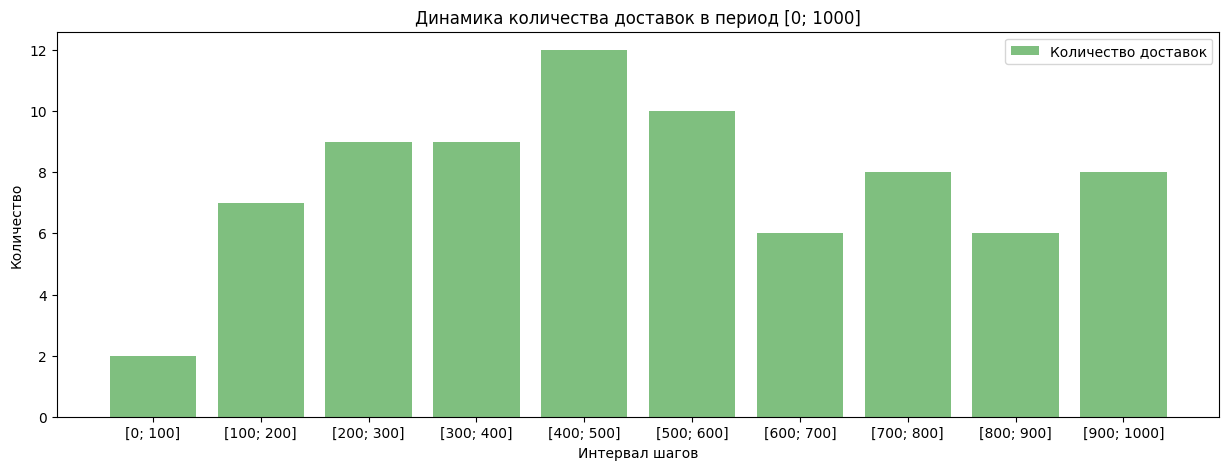

In [ ]:
random.seed(42)
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=10,
              consumer_max=20,
              consumer_delta=1,
              seller_min=8,
              seller_max=10,
              seller_delta=1,
              num_of_sellers_delivery=5,
              percent = 99)
model.run(1000)
model.plot_dynamics(0, 1000)
model.plot_delivery()

## Пример 8

100%|██████████| 1001/1001 [00:00<00:00, 80870.99it/s]


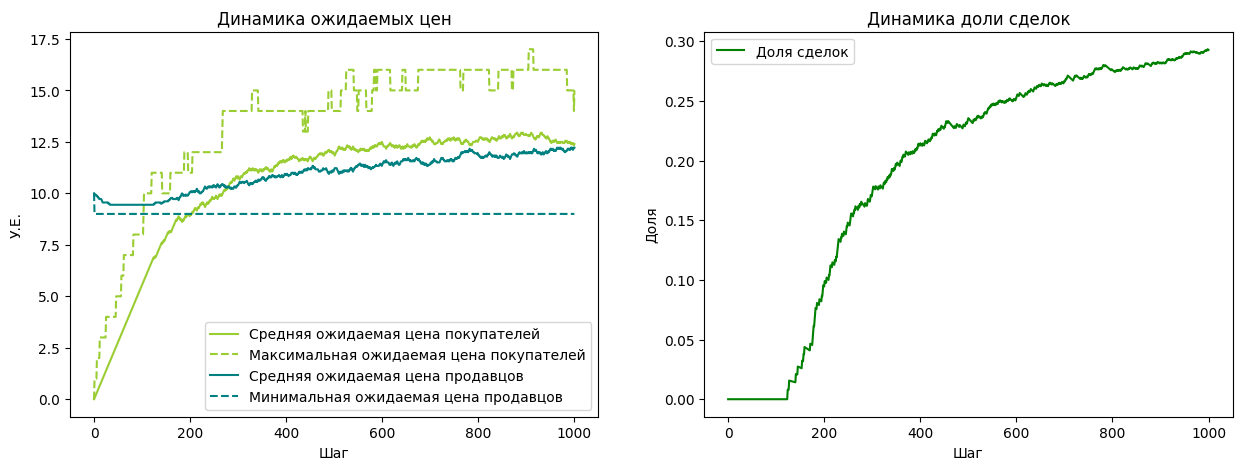

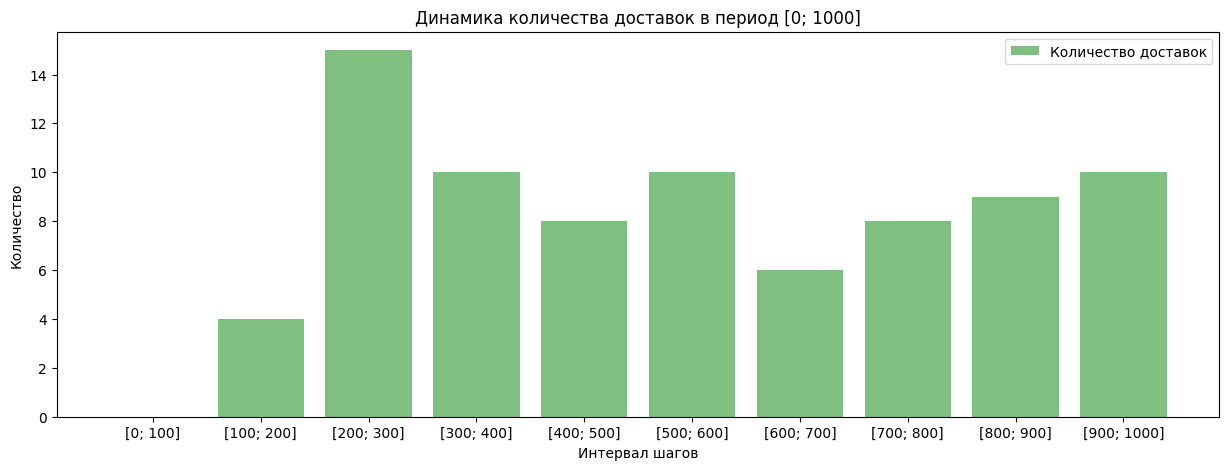

In [ ]:
random.seed(42)
model = Model(num_of_consumers=18,
              num_of_sellers=18,
              consumer_min=10,
              consumer_max=20,
              consumer_delta=1,
              seller_min=8,
              seller_max=10,
              seller_delta=1,
              num_of_sellers_delivery=0,
              percent = 30)
model.run(1000)
model.plot_dynamics(0, 1000)
model.plot_delivery()

## Пример 9

100%|██████████| 1001/1001 [00:00<00:00, 31785.13it/s]


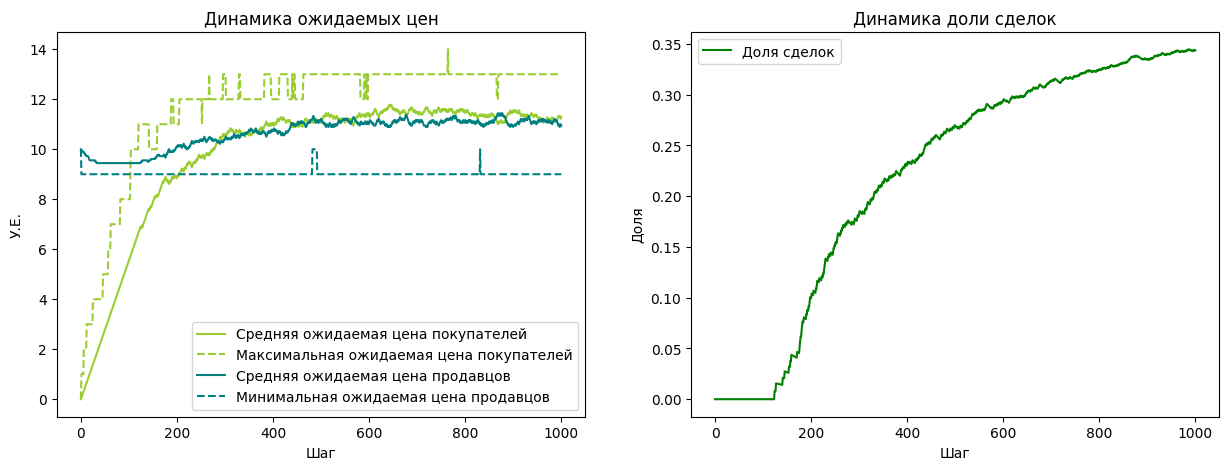

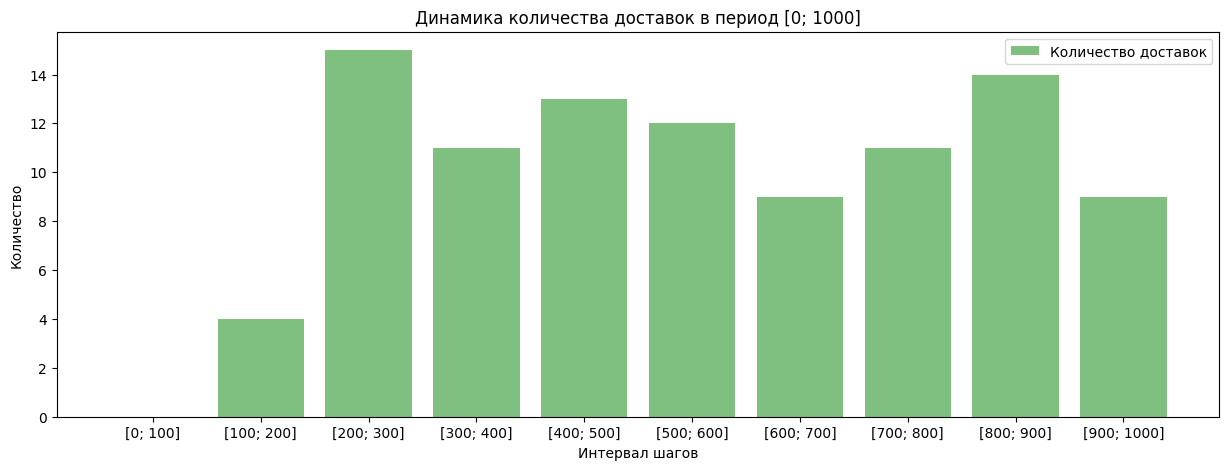

In [ ]:
random.seed(42)
model = Model(num_of_consumers=18,
              num_of_sellers=18,
              consumer_min=10,
              consumer_max=20,
              consumer_delta=1,
              seller_min=8,
              seller_max=10,
              seller_delta=1,
              num_of_sellers_delivery=18,
              percent = 30)
model.run(1000)
model.plot_dynamics(0, 1000)
model.plot_delivery()

Проведем анализ поведения модифицированной модели:
* Для начала изучим влияние парамтра **percent** на поведение модели - для этого рассмотрим примеры 6 и 7: они различаются только тем, что в Примере 6 **percent** = 1, а в Примере 7 **percent** = 99.
Легко заметить, что в Примере 7 максимальная цена покупателей выше, чем в Примере 6 - это можно объяснить тем, что для покупателей, которым требуется доставка, цена товара вместе с ней при коэффициенте 0.99 скорее всего будет превышать **c.max_price**, поэтому они не смогут совершать сделки и будут постоянно повышать ожидаемую цену. Кроме того, заметим, что в Примере 6 на 1000-м шаге динамика доли сделок уже приближается к значению 0.5, а в Примере 7 - только дохожит до 0.35; это происходит по той же причине: вследствие высокой цены доставки происходит меньше сделок. Из этого же следует и то, что количество осуществленных доставок в Примере 7 меньше, чем в Примере 6 - чтобы в этом убедиться, достаточно рассмотреть график динамики количества доставок в период [0; 1000]: в первом случае максимальное значение по оси OY (то есть максимальное количество доставок за 100 шагов) равно 12, а во втором - чуть меньше 14. Интересно, что в обоих примерах это максимальное значение достигается на отрезке [400; 500]

    Таким образом, чем больше параметр **percent**, тем меньше совершается сделок
* Теперь рассмотрим Примеры 8 и 9: они различаются тем, что в Примере 8 **num_of_sellers_delivery** = 0, а в Примере 9 **num_of_sellers_delivery** = 18; Интуитивно ясно, что если никто из продавцов не согласен заниматься организацией доставки, то сделки будут происходить только между покупателями, которым не нужна доставка, и продавцами $\Rightarrow$ это снижает количество сделок по сравнению с Примером 9, в котором, напротив, при возможности договориться по цене сделка состоится между любым продавцом и покупателем, т.к. все продавцы готовы организовать доставку. Это предположение подтверждает график динамики доли сделок: для Примера 8 на 1000-м шаге доля сделок еще не доходит до значения 0.3, а в Примере 9 уже приближается к значению 0.35; Из этого делаем вывод о том, что чем больше продавцов готовы заняться организацией доставки, тем выше доля сделок.